In [1]:
import pandas as pd

In [2]:
main_df = pd.read_csv("creditcard.csv")
main_df.head() #Bu veri setinde değişkenler Vx şeklinde belirtilmiş

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


array([[<AxesSubplot: title={'center': 'Time'}>,
        <AxesSubplot: title={'center': 'V1'}>,
        <AxesSubplot: title={'center': 'V2'}>,
        <AxesSubplot: title={'center': 'V3'}>,
        <AxesSubplot: title={'center': 'V4'}>,
        <AxesSubplot: title={'center': 'V5'}>],
       [<AxesSubplot: title={'center': 'V6'}>,
        <AxesSubplot: title={'center': 'V7'}>,
        <AxesSubplot: title={'center': 'V8'}>,
        <AxesSubplot: title={'center': 'V9'}>,
        <AxesSubplot: title={'center': 'V10'}>,
        <AxesSubplot: title={'center': 'V11'}>],
       [<AxesSubplot: title={'center': 'V12'}>,
        <AxesSubplot: title={'center': 'V13'}>,
        <AxesSubplot: title={'center': 'V14'}>,
        <AxesSubplot: title={'center': 'V15'}>,
        <AxesSubplot: title={'center': 'V16'}>,
        <AxesSubplot: title={'center': 'V17'}>],
       [<AxesSubplot: title={'center': 'V18'}>,
        <AxesSubplot: title={'center': 'V19'}>,
        <AxesSubplot: title={'center': 'V20'}

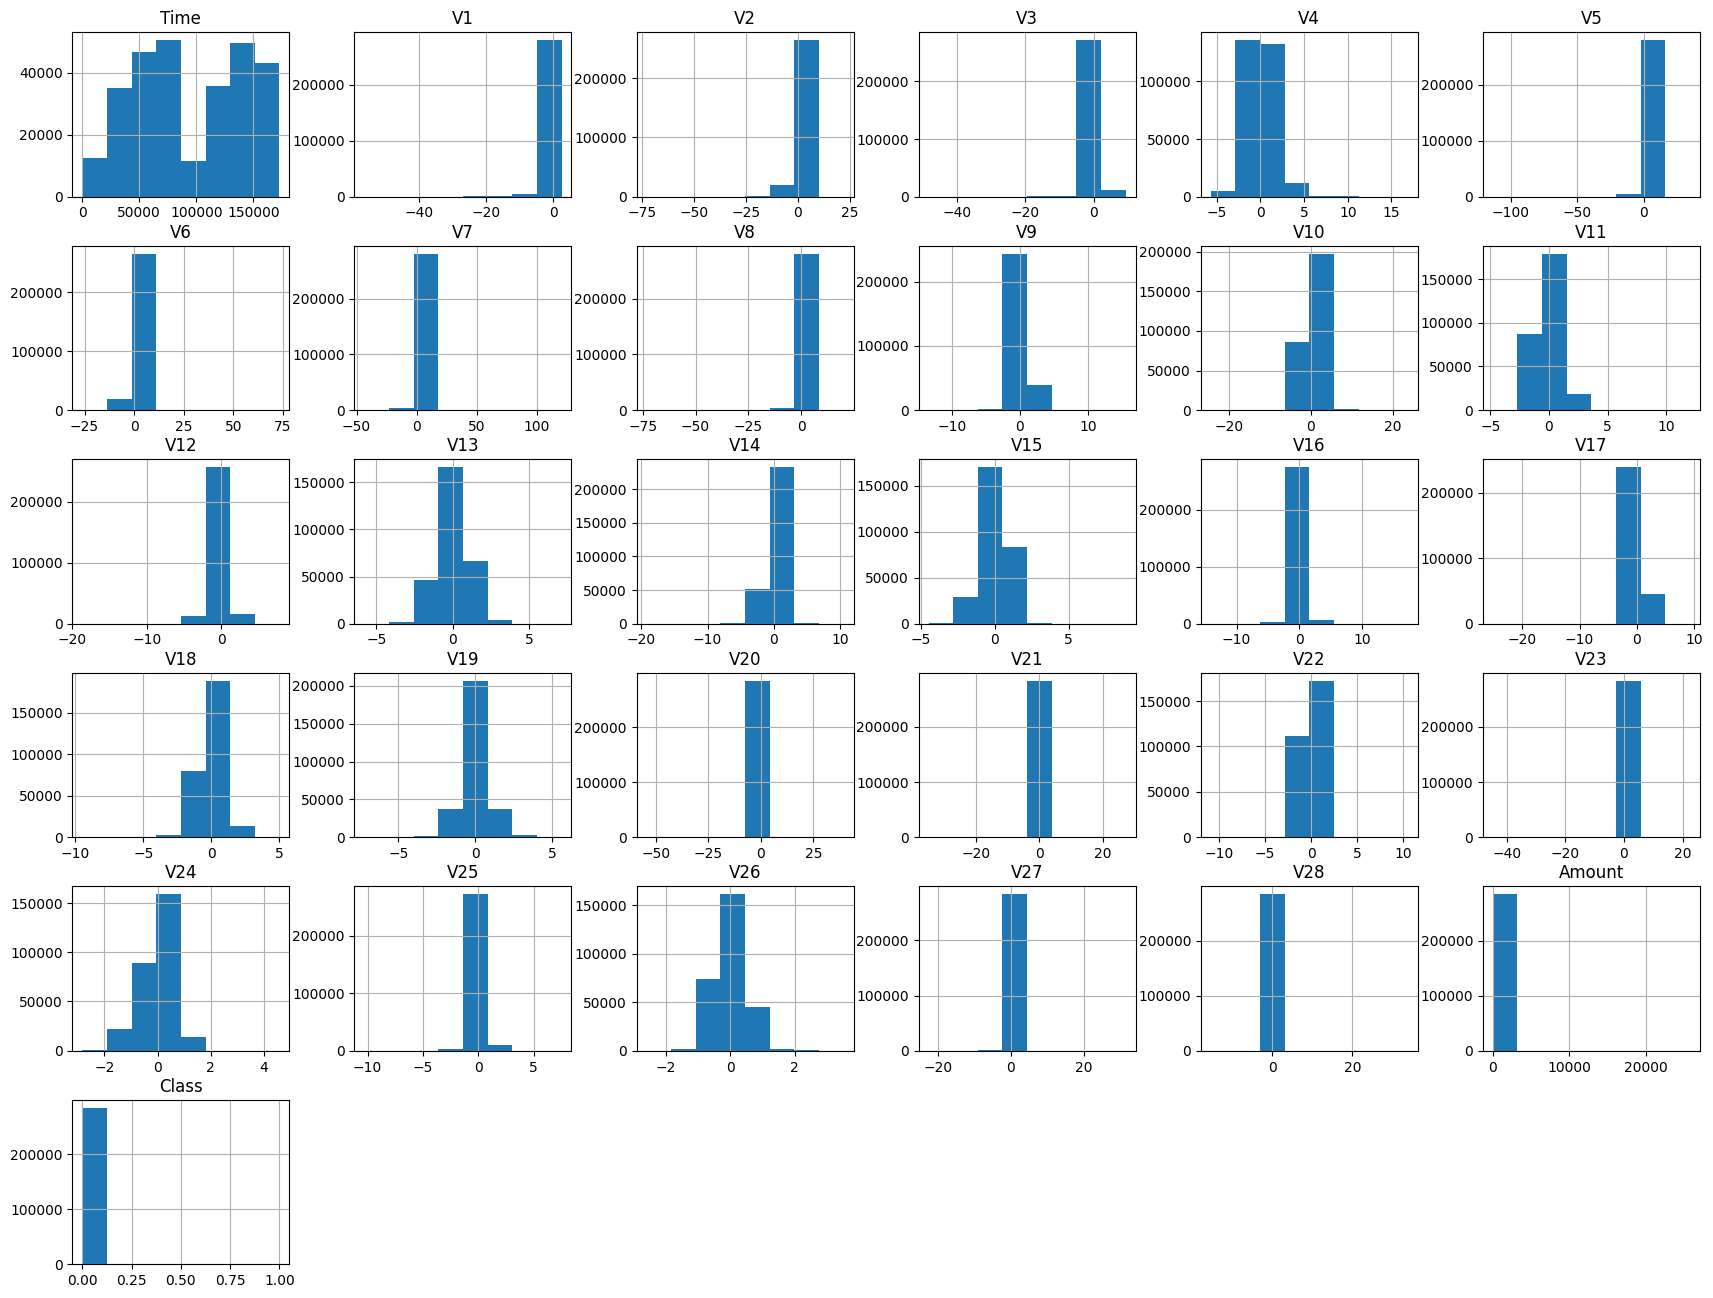

In [3]:
main_df.hist(bins=8,figsize=(21, 16)) #verilerin genel durumunu bakalım

In [4]:
main_df.Class.value_counts() #Kaç tane satın alım şüpheli kabul edilmiş

0    284315
1       492
Name: Class, dtype: int64

In [5]:
corr_matrix = main_df.corr()
corr_matrix["Class"].sort_values(ascending=False)#Korelasyon matrisine bakalım

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

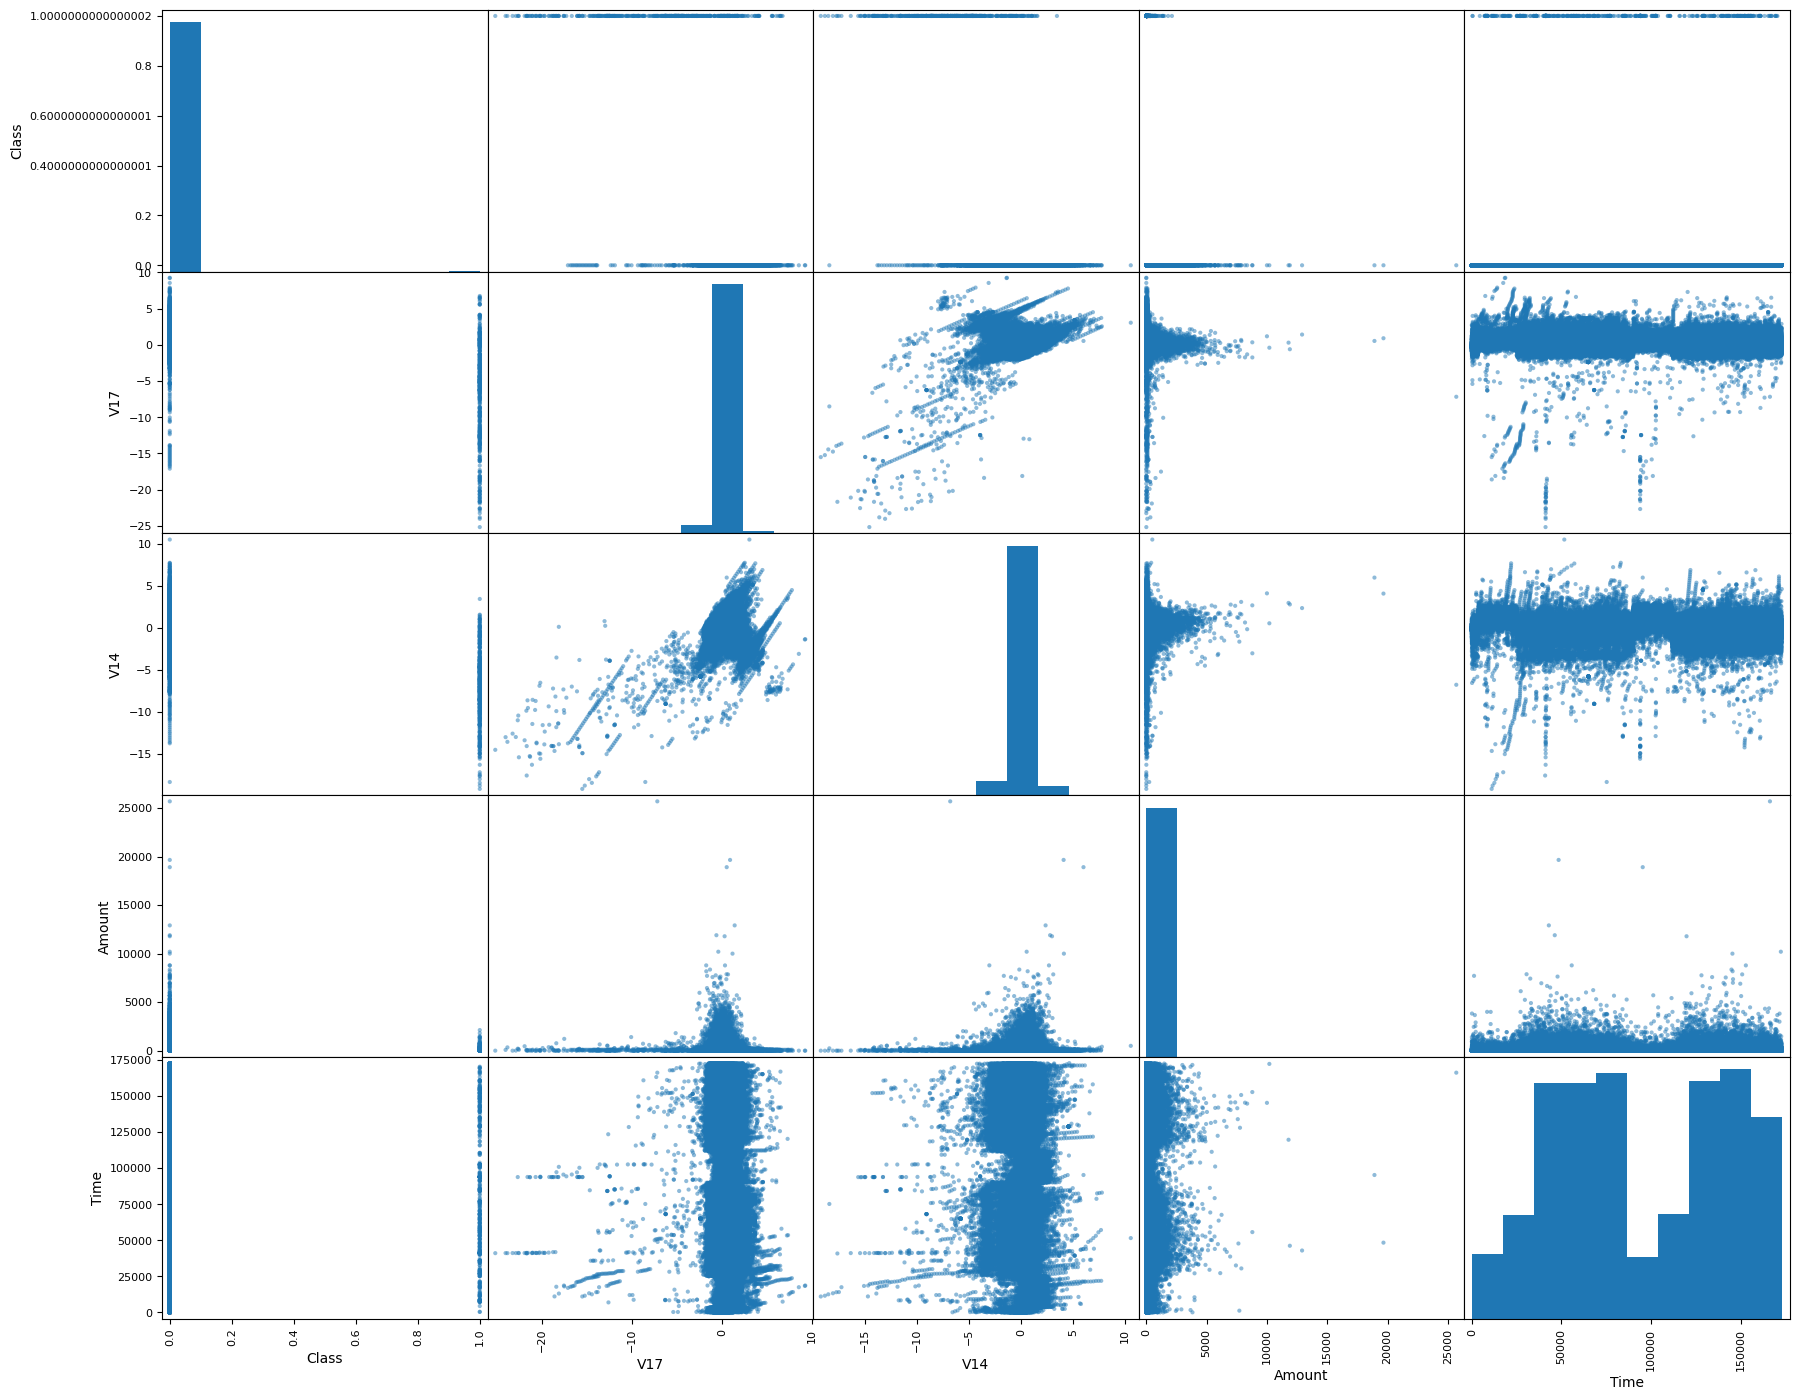

In [6]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ["Class", "V17", "V14", "Amount", "Time"]
scatter_matrix(main_df[attributes], figsize=(21, 17))
plt.show()

In [16]:
copy_df = main_df
fraud_df = copy_df.loc[copy_df["Class"] == 1]
clean_df = copy_df.loc[copy_df["Class"] == 0][:len(fraud_df)]
normal_distributed_df = pd.concat([fraud_df, clean_df])
normal_distributed_df["Class"].value_counts() 
#Veri setinde fraud içeren eleman sayısı çok çok az olduğu için modelimizi eğitirken daha küçük bir ara durum kullancağız

1    492
0    492
Name: Class, dtype: int64